REGULADOR PI REAL
----------------

$$G_c(s)=k_c\beta \frac{Ts+1}{\beta Ts+1} = k_c\frac{s+\frac{1}{T}}{s+\frac{1}{\beta T}} \qquad \beta>1$$

* El polo $-\frac{1}{\beta T}$ está situado más cerca del origen que el cero $-\frac{1}{T}$

------------------------------------------------------------------------

Diagrama de compensador por retardo:

<img align=right src="img/grafica_comp_retardo.svg">
<img align=right src="img/lugar_raices_comp_retardo.svg">

[Falta: Diagrama de BODE]

* El polo $-\frac{1}{\beta T}$ está situado más cerca del origen que el cero $-\frac{1}{T}$.

* La función principal deun compensador de retardo es proporcionar una atenuación en el rango de altas frecuencias a fin de aportar un margen de fase suficiente al sistema.

* La característica de retarde de fase *No tiene importancia* en la compensación por retardo.

----------------------------------------------------------

[...]

**EJEMPLO**

$$G(s) = \frac{2}{s(s+1)(s+2)}$$

Diseñar un compensador para que el sistema propuesto presente:

* Un error de velocidad $k_v = 5seg^{-1}$ 
* Un margen de fase de al menos 40º
* Margen de ganancia de al menos 10dB

------------------------------------------------


In [47]:
from scipy import signal, interpolate # importamos interpolate para obtener datos de la función de Bode
import sympy as sp
import numpy as np
sp.init_printing(use_latex=True) # para que las salidas sean bonitas
import matplotlib.pyplot as plt
%matplotlib inline

1.-
El compensador PI real será de la siguiente forma:

$ \qquad G_c(s)=k_c \beta \frac{Ts+1}{\beta Ts+1}$

$ \qquad K=k_c \cdot \beta$




In [48]:
kv=5
β,kc,s,T = sp.symbols('β,kc,s,T')
K=kc*β
G=2/(s*(s+1)*(s+2))
Gc= K*(T*s +1)/(β*T*s+1)

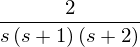

In [49]:
G

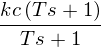

In [50]:
Gc

2.- 
Se ajusta la ganancia

$k_v = \lim_{s \rightarrow 0} s \frac{Ts+1}{\beta Ts+1}KG(s) = \lim_{s \rightarrow 0}s\cdot K \frac{2}{s(s+1)(s+2)} = 5$



In [51]:
sp.limit(s*Gc*G,s,0)

In [52]:
K=kv

3.-
Se dibuja el diagrama de Bode con la ganancia = K:

$$KG(s) = \frac{10}{s(s+1)(s+2)}$$

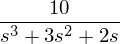

In [53]:
sp.expand(kv*G)

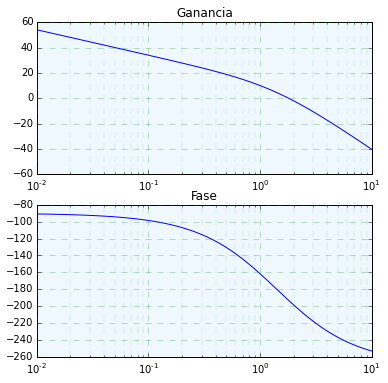

In [82]:
TKG=signal.lti([10],[1, 3, 2, 0])
w, mag, phase = signal.bode(TKG) # Diagrama de bode: frecuencias, magnitud y fase
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))

ax1.set_title('Ganancia') #Decoracion
ax2.set_title('Fase') # Decoracion

ax1.grid(color='g', linestyle='--', linewidth=0.5, alpha=0.5,which='major') #Decoracion
ax1.grid(color='g', linestyle='--', linewidth=0.2, alpha=0.5,which='minor') #Decoracion

ax2.grid(color='g', linestyle='--', linewidth=0.5, alpha=0.5,which='major') #Decoracion
ax2.grid(color='g', linestyle='--', linewidth=0.2, alpha=0.5,which='minor') #Decoracion

ax1.semilogx(w, mag) # Eje x logarítmico
ax2.semilogx(w, phase) # Eje x logarítmico

ax1.set_axis_bgcolor('aliceblue')# Mas decoraciones
ax2.set_axis_bgcolor('aliceblue')# Mas decoraciones

In [83]:
# Usamos el método interpolate de scipy
M_W = interpolate.interp1d(mag,w) # Ingresa ganancia, devuelve frecuencia 
W_M = interpolate.interp1d(w,mag) # ingresa frecuencia, duevuelve ganancia
P_W = interpolate.interp1d(phase,w)
W_P = interpolate.interp1d(w,phase)

In [84]:
M_W(0) # 1.8028696116307432 rd para ganancia 0
W_P(1.8028696116307432) # Angulo de -192.97900193093383 para ganancia cero
P_W(-180) #1.4143192918261236 rd para fase -180
W_M(1.4143192918261236)# 4.436397910885376 dBs para fase = -180

array(4.436397910885376)

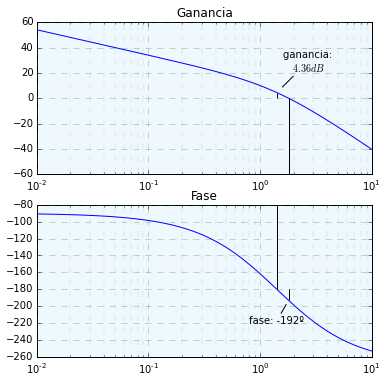

In [85]:
# Cruce de fase por -180 grados
ax1.vlines(1.4143192918261236, 4.436397910885376, 0, colors=u'k', linestyles=u'solid') #, Av en cruce de fas'
ax2.vlines(1.4143192918261236,-180,-80,colors=u'k', linestyles=u'solid')

ax1.text(1.4143192918261236, 4.436397910885376, u'ganancia: \n $4.36dB$', withdash=True,
         dashdirection=1,
         dashlength=15,
         rotation=0,
         dashrotation=45,
         dashpush=8,
         )

#Cruce de ganancia por 0 dBs
ax1.vlines(1.8028696116307432,0,-60)
ax2.vlines(1.8028696116307432,-180,-192.97900193093383)

ax2.text(1.8028696116307432, -192.97900193093383, u'fase: -192º', withdash=True,
         dashdirection=0,
         dashlength=10,
         rotation=0,
         dashrotation=60,
         dashpush=5,
         )   


fig

[Index](index.ipynb)